# Tourist Parents Project

### 1. A description of the problem and a discussion of the background. 

##### My parents want to travel around South America, mainly to Colombia, Peru, Brazil, Bolivia and Argentina, they want to go to the 10 best Museums to visit, they want to organize their trip but they don't know how to do it.

### 2. A description of the data and how it will be used to solve the problem.

##### I will use foursquare to find the 10 best museums to visit according to the tourists' scores, compare these values and decide which country to start your vacation with. I will relate the data of these places, transport facilities, restaurants near them, pharmacies, etc.

## Import Necessary Libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


## Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = 'Y5NFNJTKRVSS5SMMEDTUZRZM54ZJZDXSY5OLNFTWCKXPCT22' # your Foursquare ID
CLIENT_SECRET = 'K40GCUW1QNTWOPMBKWDUXJAYNDMUGHDMWWYU1XRT2HC1HRNV' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Y5NFNJTKRVSS5SMMEDTUZRZM54ZJZDXSY5OLNFTWCKXPCT22
CLIENT_SECRET:K40GCUW1QNTWOPMBKWDUXJAYNDMUGHDMWWYU1XRT2HC1HRNV


## So let's start by converting the Bogota-Colombia address to its latitude and longitude coordinates.

#### In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent foursquare_agent, as shown below

In [3]:
address = 'Bogota, Colombia'
#address = 'Colombia'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

4.59808 -74.0760439


## Search for Museum places category

In [4]:
search_query = 'Museo'
radius = 900000
print(search_query + ' .... OK!')

 

Museo .... OK!


### Define the corresponding URL

In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=Y5NFNJTKRVSS5SMMEDTUZRZM54ZJZDXSY5OLNFTWCKXPCT22&client_secret=K40GCUW1QNTWOPMBKWDUXJAYNDMUGHDMWWYU1XRT2HC1HRNV&ll=4.59808,-74.0760439&v=20180604&query=Museo&radius=900000&limit=30'

## Send the GET Request and examine the results

In [7]:
results = requests.get(url).json()


### Get relevant part of JSON and transform it into a pandas dataframe

In [8]:
# assign relevant part of JSON to venues

venues = results['response']['venues']
#print(results['response']['venues'].keys())


In [9]:
#venues[9]

In [10]:
# define the dataframe columns
column_names = ['Id','Museo', 'Address', 'Latitude', 'Longitude'] 

# instantiate the dataframe
Museos = pd.DataFrame(columns=column_names)



In [11]:
Museos

,Id,Museo,Address,Latitude,Longitude


##### museum data with address, latitude and longitude

In [12]:
for data in venues:
    Ids = data['id'] 
    museo = data['name'] 
        
    location_lat = data['location']['lat']
    location_lng = data['location']['lng']
 
    location_Add = data['location']['formattedAddress']    
    location_address = location_Add [0]
    #neighborhood_city = neighborhood_latlon[1]
    
    Museos = Museos.append({'Museo':museo,
                            'Id':Ids,
                            'Address': location_address,
                            'Latitude': location_lat,
                            'Longitude': location_lng}, ignore_index=True)

In [13]:
print("Shape: ", Museos.shape)
Museos.head(1)

Shape:  (30, 5)


,Id,Museo,Address,Latitude,Longitude
0,4cfa8620084f548178af7b09,Museo de La Independencia Casa del Florero,Carrera 7 # 11-28,4.5984,-74.075241


##### Using the Search API, let us search for museums in Bogota into a pandas dataframe.

##### Eliminate non-museum places in Bogota

In [14]:
Museos_Bta = Museos.drop([7, 21], axis =0)
print("Shape: ", Museos_Bta.shape)
Museos_Bta.head(1)


Shape:  (28, 5)


,Id,Museo,Address,Latitude,Longitude
0,4cfa8620084f548178af7b09,Museo de La Independencia Casa del Florero,Carrera 7 # 11-28,4.5984,-74.075241


In [15]:
 # import library to handle requests
import requests

# create a pandas dataframe 
df_Bta_Museos = pd.DataFrame(columns = ['Museo_Id', 'Museo_Bta', 'Museo_Address', 'Museo_Bta_Lat', 'Museo_Bta_Long','Museo_name', 
                                        'Museo_city', 'Museo_Address', 'Museo_Latitude', 'Museo_Longitude', 'Museo_Category',
                                       'Museum_Venue_id'])

# URL parameters
RADIUS = 2000
QUERY = 'Museo'
LIMIT = 50
    
    

# Loop through the museum data
for index, row in Museos_Bta.iterrows():
    # retrieve name details from the dataframe for current row
    Id = row[0]
    Museo = row[1]
    Museo_Add = row[2]
    LATITUDE = row[3]
    LONGITUDE = row[4]
    
    # fetch the results from the Search API for the name
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                                   CLIENT_SECRET,
                                                                                                                                   LATITUDE,
                                                                                                                                   LONGITUDE,
                                                                                                                                   VERSION,
                                                                                                                                   QUERY,
                                                                                                                                   RADIUS,
                                                                                                                                   LIMIT)
    results = requests.get(url).json()
    
   

    # Loop through the List of museum retrieved from Foursquare for the neighborhood
    for i in range(0,len(results['response']['venues'])):
        # retrieve restaurant details from the result list for current row
        Museum_name = results['response']['venues'][i]['name']
        
        try:
            Museum_city = results['response']['venues'][i]['location']['city']
        except:
            Museum_city = ''
            
        Museum_address = results['response']['venues'][i]['location']['formattedAddress']
        Museum_latitude = results['response']['venues'][i]['location']['lat']
        Museum_longitude = results['response']['venues'][i]['location']['lng']
        Museum_Venue_id = results['response']['venues'][i]['id']
        

 # Check to see if the museum has any categories
        if (len(results['response']['venues'][i]['categories']) > 0):
            Museum_category = results['response']['venues'][i]['categories'][0]['name']
        else:
            Museum_category = ''
        
        # Add the data row to the Museum dataframe
        df_Bta_Museos = df_Bta_Museos.append({'Museo_Id' : Id,
                                              'Museo_Bta' : Museo, 
                                              'Museo_Address' : Museo_Add, 
                                              'Museo_Bta_Lat' : LATITUDE, 
                                              'Museo_Bta_Long' : LONGITUDE,  
                                              'Museo_name' : Museum_name,
                                              'Museo_city' : Museum_city, 
                                              'Museo_Address' : Museum_address,
                                              'Museo_Latitude' : Museum_latitude,
                                              'Museo_Longitude' : Museum_longitude, 
                                              'Museo_Category' : Museum_category,
                                               'Museum_Venue_id' : Museum_Venue_id}, ignore_index=True)

# Print the first 10 rows of the museums dataframe
df_Bta_Museos.head(1)


,Museo_Id,Museo_Bta,Museo_Address,Museo_Bta_Lat,Museo_Bta_Long,Museo_name,Museo_city,Museo_Address,Museo_Latitude,Museo_Longitude,Museo_Category,Museum_Venue_id
0,4cfa8620084f548178af7b09,Museo de La Independencia Casa del Florero,"[Carrera 7 # 11-28, Bogotá, Bogotá D.C., Colom...",4.5984,-74.075241,Museo de La Independencia Casa del Florero,Bogotá,"[Carrera 7 # 11-28, Bogotá, Bogotá D.C., Colom...",4.5984,-74.075241,History Museum,4cfa8620084f548178af7b09


In [16]:
df_Bta_Museos.shape

(1375, 12)

##### The number of 1378 seems to be very high for the number of museums in the City of Bogota. Let us check to see if there are any duplicate entries for museums in the data set obtained.

In [17]:
len(df_Bta_Museos['Museum_Venue_id'].unique())

68

##### We can see that our guess was right. There are only 68 unique Museums in the data set. So let us cleanup the museums dataset by removing the duplicates from the dataframe.

In [18]:
# create a copy of the museums dataframe for storing the new list without the duplicate museums
df_Bta_Museos_L = df_Bta_Museos.drop_duplicates(subset='Museum_Venue_id', keep='first', inplace=False)
print (df_Bta_Museos_L.shape)

#df_Bta_Museos_L.head(10)

(68, 12)


##### we have some museums in Bogota

# Museum Ratings from Foursquare

In [19]:
# Loop through the List of Museums to find the ratings for each
for index, row in df_Bta_Museos_L.iterrows():
    VENUE_ID = row[11] # this is the Foursquare Venue Id
    
    # Use the Foursquare Venue details API to fetch the venue details
    details_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(VENUE_ID,
                                                                                                  CLIENT_ID,
                                                                                                  CLIENT_SECRET,
                                                                                                  VERSION)
    venue_details = requests.get(details_url).json()
    
    venue_details 
    
    # Read the rating for the venue from the API result
    try:
        rating = venue_details['response']['venue']['rating']
    
    except:
        rating = 0

    # populate the rating onto the restaurants dataframe
    df_Bta_Museos_L.loc[index, 'Rating'] = rating
    
#venue_details 

df_Bta_Museos_L.head(1)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Museo_Id,Museo_Bta,Museo_Address,Museo_Bta_Lat,Museo_Bta_Long,Museo_name,Museo_city,Museo_Address,Museo_Latitude,Museo_Longitude,Museo_Category,Museum_Venue_id,Rating
0,4cfa8620084f548178af7b09,Museo de La Independencia Casa del Florero,"[Carrera 7 # 11-28, Bogotá, Bogotá D.C., Colom...",4.5984,-74.075241,Museo de La Independencia Casa del Florero,Bogotá,"[Carrera 7 # 11-28, Bogotá, Bogotá D.C., Colom...",4.5984,-74.075241,History Museum,4cfa8620084f548178af7b09,7.0


# Barh Clasification

In [20]:
# Clean up the dataset to remove columns that are not informative to us for visualization 

df_Bta_Museos_L.drop(['Museo_Id', 'Museo_Bta', 'Museo_Address', 'Museo_Bta_Lat', 'Museo_Bta_Long','Museo_city'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_Bta_Museos_L.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Museo_name,Museo_Latitude,Museo_Longitude,Museo_Category,Museum_Venue_id,Rating
0,Museo de La Independencia Casa del Florero,4.598400,-74.075241,History Museum,4cfa8620084f548178af7b09,7.0
1,Museo Botero,4.596705,-74.073165,Art Museum,4b79975ef964a520e4032fe3,9.3
2,Museo de Arte del Banco de la República,4.596319,-74.073418,Art Museum,4c9e6831ca44236ab69c2a99,9.2
3,Museo Histórico de la Policía Nacional,4.597853,-74.078580,History Museum,4d2d216f0f812c0f6d3d3e6a,8.2
4,Museo Iglesia Santa Clara,4.596910,-74.077353,History Museum,4de272d81f6e3190cd0fc59f,8.2


In [21]:
# Rename some of the columns so that they make sense.

df_Bta_Museos_L.rename(columns={'Museo_name':'Name', 'Museo_Latitude':'Latitude','Museo_Longitude':'Longitude','Museo_Category':'Category',
                       'Museum_Venue_id':'id','Rating':'Rating'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_Bta_Museos_L.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Name,Latitude,Longitude,Category,id,Rating
0,Museo de La Independencia Casa del Florero,4.598400,-74.075241,History Museum,4cfa8620084f548178af7b09,7.0
1,Museo Botero,4.596705,-74.073165,Art Museum,4b79975ef964a520e4032fe3,9.3
2,Museo de Arte del Banco de la República,4.596319,-74.073418,Art Museum,4c9e6831ca44236ab69c2a99,9.2
3,Museo Histórico de la Policía Nacional,4.597853,-74.078580,History Museum,4d2d216f0f812c0f6d3d3e6a,8.2
4,Museo Iglesia Santa Clara,4.596910,-74.077353,History Museum,4de272d81f6e3190cd0fc59f,8.2


## For consistency, ensure that all column labels of type string

In [26]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_Bta_Museos_L.columns)

# Set the Museum name as index - useful for quickly looking up Museum using .loc method.

df_Bta_Museos_L.set_index('Name', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_Bta_Museos_L.head(15)




KeyError: "None of ['Name'] are in the columns"

In [23]:
print ('data dimensions:', df_Bta_Museos_L.shape)

data dimensions: (68, 5)


In [24]:
### type your answer here

#\\ # sort dataframe on 'Rating' column (descending)
df_Bta_Museos_L.sort_values(by='Rating', ascending=True, inplace=True)
#-->

#<!--
#\\ # get top 10 countries
df_top10 = df_Bta_Museos_L['Rating'].tail(10)
df_top10

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Name
La Casa Del Florero Museo                    7.8
Casa Museo Quinta de Bolívar                 8.1
Museo Iglesia Santa Clara                    8.2
Museo Histórico de la Policía Nacional       8.2
Maria Tomasa - Cocina Caribe - Sede Museo    8.3
Museo del Oro del Banco de la República      8.6
WOK Museo Nacional                           8.9
Museo Nacional de Colombia                   9.1
Museo de Arte del Banco de la República      9.2
Museo Botero                                 9.3
Name: Rating, dtype: float64

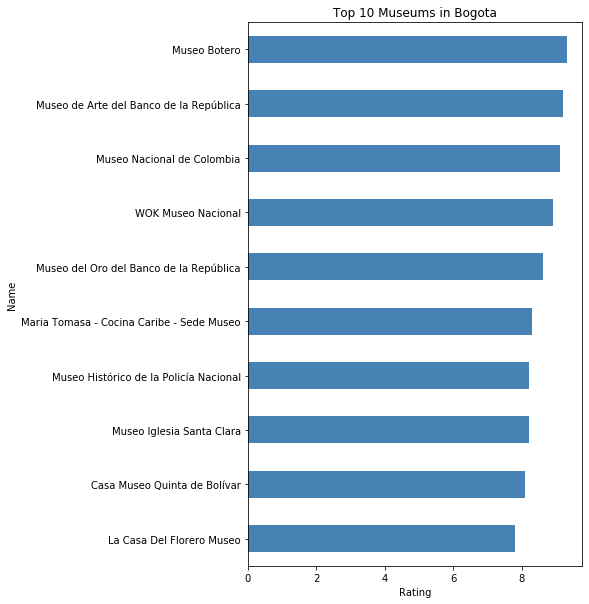

In [25]:
 # generate plot
df_top10.plot(kind='barh', figsize=(6, 10), color='steelblue')
plt.xlabel('Rating')
plt.title('Top 10 Museums in Bogota')
#-->

#<!--
#\\ # annotate value labels to each country
#for index, value in enumerate(df_top10): 
    #label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    #plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
    #plt.annotate(label, xy=(value - 470, index - 0.10), color='white')
#-->

#<!--
plt.show()
#-->

# Let's check how many Museum were returned for each category

In [27]:
df_Bta_Museos_L.groupby('Name').count()

,Latitude,Longitude,Category,id,Rating
Name,,,,,
Archie`s,1,1,1,1,1
Auditorio Teresa Cuervo Borda,1,1,1,1,1
Cafe Museo Del Oro,1,1,1,1,1
Casa Museo Jorge Eliécer Gaitán,1,1,1,1,1
Casa Museo Quinta de Bolívar,1,1,1,1,1
...,...,...,...,...,...
TransMilenio: Museo del Oro,1,1,1,1,1
Typykos Museo Nacional,1,1,1,1,1
WOK Museo Nacional,1,1,1,1,1


In [28]:
# Let's find out how many unique categories can be curated from all the returned venues

print('There are {} uniques categories.'.format(len(df_Bta_Museos_L['Category'].unique())))

There are 26 uniques categories.


In [29]:
# Analyze Each Museum

# one hot encoding
MuseoBta_onehot = pd.get_dummies(df_Bta_Museos_L[['Category']], prefix="", prefix_sep="")

# add name column back to dataframe
#MuseoBta_onehot['Name'] = df_Bta_Museos_L['Category']

# move name column to the first column
fixed_columns = [MuseoBta_onehot.columns[-1]] + list(MuseoBta_onehot.columns[:-1])
MuseoBta_onehot = MuseoBta_onehot[fixed_columns]

MuseoBta_onehot.head()


,Science Museum,Art Gallery,Art Museum,Asian Restaurant,Auditorium,Bank,Building,Bus Line,Caribbean Restaurant,Coffee Shop,...,Hotel,Italian Restaurant,Jewelry Store,Latin American Restaurant,Museum,Plaza,Public Art,Residential Building (Apartment / Condo),Restaurant,Sandwich Place
Name,,,,,,,,,,,,,,,,,,,,,
Sala Luis Caballero Museo Banco de la República,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
La casona del museo,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Estación Museo Del Oro,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Museo Univeridad Nacional De Colombia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cafe Museo Del Oro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
## And let's examine the new dataframe size

MuseoBta_onehot.shape

(68, 26)

In [31]:
# Next, let's group rows by Museums and by taking the mean of the frequency of occurrence of each category
MuseoBta_grouped = MuseoBta_onehot.groupby('Name').mean().reset_index()
MuseoBta_grouped

,Name,Science Museum,Art Gallery,Art Museum,Asian Restaurant,Auditorium,Bank,Building,Bus Line,Caribbean Restaurant,...,Hotel,Italian Restaurant,Jewelry Store,Latin American Restaurant,Museum,Plaza,Public Art,Residential Building (Apartment / Condo),Restaurant,Sandwich Place
0,Archie`s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Auditorio Teresa Cuervo Borda,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cafe Museo Del Oro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Casa Museo Jorge Eliécer Gaitán,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Casa Museo Quinta de Bolívar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,TransMilenio: Museo del Oro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,Typykos Museo Nacional,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
63,WOK Museo Nacional,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,Zona Gastronómica Museo Nacional,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Let's confirm the new size
MuseoBta_grouped.shape

Museos_Bta_Top = MuseoBta_grouped.drop([0,1,2,5,6,7,8,9,10,11,12,14,16,50,54,55,56,57,59,60,61,62,63,64,65], axis =0)
print("Shape: ", Museos_Bta_Top.shape)
Museos_Bta_Top.head(1)

Shape:  (41, 27)


,Name,Science Museum,Art Gallery,Art Museum,Asian Restaurant,Auditorium,Bank,Building,Bus Line,Caribbean Restaurant,...,Hotel,Italian Restaurant,Jewelry Store,Latin American Restaurant,Museum,Plaza,Public Art,Residential Building (Apartment / Condo),Restaurant,Sandwich Place
3,Casa Museo Jorge Eliécer Gaitán,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Let's print each name along with the top 5 most common Category

#num_top_venues = 5

#for hood in Museos_Bta_Top['Name']:
   # print("----"+hood+"----")
   # temp = Museos_Bta_Top[Museos_Bta_Top['Name'] == hood].T.reset_index()
   # temp.columns = ['venue','freq']
    #temp = temp.iloc[1:]
    #temp['freq'] = temp['freq'].astype(float)
    #temp = temp.round({'freq': 2})
    #print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    #print('\n')

In [33]:
# Let's put that into a pandas dataframe
# First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [34]:
# Now let's create the new dataframe and display the top 5 venues for each Museums

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Museum_venues_sorted = pd.DataFrame(columns=columns)
Museum_venues_sorted['Name'] = Museos_Bta_Top['Name']

for ind in np.arange(Museos_Bta_Top.shape[0]):
    Museum_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Museos_Bta_Top.iloc[ind, :], num_top_venues)


Museum_venues_sorted.head()

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Casa Museo Jorge Eliécer Gaitán,History Museum,Sandwich Place,Diner,Art Gallery,Art Museum
4,Casa Museo Quinta de Bolívar,History Museum,Sandwich Place,Diner,Art Gallery,Art Museum
13,La Casa Del Florero Museo,History Museum,Sandwich Place,Diner,Art Gallery,Art Museum
15,MUSEO LA SALLE,Science Museum,Restaurant,Art Gallery,Art Museum,Asian Restaurant
17,Museo 20 De Julio,Historic Site,Sandwich Place,Diner,Art Gallery,Art Museum


# Cluster Museums


In [35]:
# Run k-means to cluster the name into 5 clusters.
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

Museum_grouped_clustering = Museos_Bta_Top.drop('Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Museum_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 3, 0, 1, 0, 2, 4, 4], dtype=int32)

In [36]:
# Let's create a new dataframe that includes the cluster as well as the top 5 venues for each Museum.

# add clustering labels
Museum_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Museum_merged = df_Bta_Museos

# merge Museum_grouped with  latitude/longitude for each name
Museum_merged = Museum_merged.join(Museum_venues_sorted.set_index('Name'), on='Museo_name')

#.....
Museum_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
                                

Museum_merged.head() # check the last columns!


,Museo_Id,Museo_Bta,Museo_Address,Museo_Bta_Lat,Museo_Bta_Long,Museo_name,Museo_city,Museo_Address,Museo_Latitude,Museo_Longitude,Museo_Category,Museum_Venue_id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,4cfa8620084f548178af7b09,Museo de La Independencia Casa del Florero,"[Carrera 7 # 11-28, Bogotá, Bogotá D.C., Colom...",4.5984,-74.075241,Museo de La Independencia Casa del Florero,Bogotá,"[Carrera 7 # 11-28, Bogotá, Bogotá D.C., Colom...",4.598400,-74.075241,History Museum,4cfa8620084f548178af7b09,1.0,History Museum,Sandwich Place,Diner,Art Gallery,Art Museum
1,4cfa8620084f548178af7b09,Museo de La Independencia Casa del Florero,"[Cll. 11 (4 - 41), Bogotá, Bogotá D.C., Colombia]",4.5984,-74.075241,Museo Botero,Bogotá,"[Cll. 11 (4 - 41), Bogotá, Bogotá D.C., Colombia]",4.596705,-74.073165,Art Museum,4b79975ef964a520e4032fe3,4.0,Art Museum,Sandwich Place,Restaurant,Art Gallery,Asian Restaurant
2,4cfa8620084f548178af7b09,Museo de La Independencia Casa del Florero,"[Cll 11 (4-21), Bogotá, Bogotá D.C., Colombia]",4.5984,-74.075241,Museo de Arte del Banco de la República,Bogotá,"[Cll 11 (4-21), Bogotá, Bogotá D.C., Colombia]",4.596319,-74.073418,Art Museum,4c9e6831ca44236ab69c2a99,4.0,Art Museum,Sandwich Place,Restaurant,Art Gallery,Asian Restaurant
3,4cfa8620084f548178af7b09,Museo de La Independencia Casa del Florero,"[Kr 9 #9-28 (Calle 9 Avenida 9), Bogotá, Bogot...",4.5984,-74.075241,Museo Histórico de la Policía Nacional,Bogotá,"[Kr 9 #9-28 (Calle 9 Avenida 9), Bogotá, Bogot...",4.597853,-74.078580,History Museum,4d2d216f0f812c0f6d3d3e6a,1.0,History Museum,Sandwich Place,Diner,Art Gallery,Art Museum
4,4cfa8620084f548178af7b09,Museo de La Independencia Casa del Florero,"[Bogotá, Bogotá D.C., Colombia]",4.5984,-74.075241,Museo Iglesia Santa Clara,Bogotá,"[Bogotá, Bogotá D.C., Colombia]",4.596910,-74.077353,History Museum,4de272d81f6e3190cd0fc59f,1.0,History Museum,Sandwich Place,Diner,Art Gallery,Art Museum


In [37]:
# Finally, let's visualize the resulting clusters
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Museum_merged['Museo_Latitude'], Museum_merged['Museo_Longitude'], Museum_merged['Museo_name'], Museum_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [38]:
#Examine Clusters

#Clustrier 1

Museum_merged.loc[Museum_merged['Cluster Labels'] == 0, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]


,Museo_Bta,Museo_name,Museo_city,Museo_Address,Museo_Address,Museo_Latitude,Museo_Longitude,Museo_Category,Museum_Venue_id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
346,TransMilenio: Museo del Oro,Museo Parque Central - Torre Alta,Bogotá,"[Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]","[Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]",4.616766,-74.071018,Residential Building (Apartment / Condo),519632c2498e054cc87d7683,0.0,Residential Building (Apartment / Condo),Sandwich Place,Diner,Art Gallery,Art Museum
370,Museo de Arte Moderno de Bogotá,Museo Parque Central - Torre Alta,Bogotá,"[Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]","[Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]",4.616766,-74.071018,Residential Building (Apartment / Condo),519632c2498e054cc87d7683,0.0,Residential Building (Apartment / Condo),Sandwich Place,Diner,Art Gallery,Art Museum
398,Museo de Arte Moderno de Bogotá,Museo 20 De Julio,Bogotá,"[Bogotá, Bogotá D.C., Colombia]","[Bogotá, Bogotá D.C., Colombia]",4.626844,-74.075384,Historic Site,4e2c773c8877b69d49eb0fa7,0.0,Historic Site,Sandwich Place,Diner,Art Gallery,Art Museum
438,Casa Museo Quinta de Bolívar,Museo Parque Central - Torre Alta,Bogotá,"[Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]","[Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]",4.616766,-74.071018,Residential Building (Apartment / Condo),519632c2498e054cc87d7683,0.0,Residential Building (Apartment / Condo),Sandwich Place,Diner,Art Gallery,Art Museum
616,Museo Nacional de Colombia,Museo Parque Central - Torre Alta,Bogotá,"[Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]","[Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]",4.616766,-74.071018,Residential Building (Apartment / Condo),519632c2498e054cc87d7683,0.0,Residential Building (Apartment / Condo),Sandwich Place,Diner,Art Gallery,Art Museum
627,Museo Nacional de Colombia,Museo 20 De Julio,Bogotá,"[Bogotá, Bogotá D.C., Colombia]","[Bogotá, Bogotá D.C., Colombia]",4.626844,-74.075384,Historic Site,4e2c773c8877b69d49eb0fa7,0.0,Historic Site,Sandwich Place,Diner,Art Gallery,Art Museum
952,TransMilenio: Museo Nacional,Museo Parque Central - Torre Alta,Bogotá,"[Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]","[Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]",4.616766,-74.071018,Residential Building (Apartment / Condo),519632c2498e054cc87d7683,0.0,Residential Building (Apartment / Condo),Sandwich Place,Diner,Art Gallery,Art Museum
963,TransMilenio: Museo Nacional,Museo 20 De Julio,Bogotá,"[Bogotá, Bogotá D.C., Colombia]","[Bogotá, Bogotá D.C., Colombia]",4.626844,-74.075384,Historic Site,4e2c773c8877b69d49eb0fa7,0.0,Historic Site,Sandwich Place,Diner,Art Gallery,Art Museum
972,TransMilenio: Museo Nacional,Museo Arqueológico Casa Del Marquez de San Jorge,Bogotá,"[Carrera 6 con 7, Bogotá, Bogotá D.C., Colombia]","[Carrera 6 con 7, Bogotá, Bogotá D.C., Colombia]",4.634585,-74.062367,Historic Site,4fe9dd72e4b07aadf2b71640,0.0,Historic Site,Sandwich Place,Diner,Art Gallery,Art Museum
1001,ibis Bogota Museo,Museo Parque Central - Torre Alta,Bogotá,"[Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]","[Cr 13 A No 28-21, Bogotá, Bogotá D.C., Colombia]",4.616766,-74.071018,Residential Building (Apartment / Condo),519632c2498e054cc87d7683,0.0,Residential Building (Apartment / Condo),Sandwich Place,Diner,Art Gallery,Art Museum


In [39]:
#Clustrier 2

Museum_merged.loc[Museum_merged['Cluster Labels'] == 1, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

,Museo_Bta,Museo_name,Museo_city,Museo_Address,Museo_Address,Museo_Latitude,Museo_Longitude,Museo_Category,Museum_Venue_id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Museo de La Independencia Casa del Florero,Museo de La Independencia Casa del Florero,Bogotá,"[Carrera 7 # 11-28, Bogotá, Bogotá D.C., Colom...","[Carrera 7 # 11-28, Bogotá, Bogotá D.C., Colom...",4.598400,-74.075241,History Museum,4cfa8620084f548178af7b09,1.0,History Museum,Sandwich Place,Diner,Art Gallery,Art Museum
3,Museo de La Independencia Casa del Florero,Museo Histórico de la Policía Nacional,Bogotá,"[Kr 9 #9-28 (Calle 9 Avenida 9), Bogotá, Bogot...","[Kr 9 #9-28 (Calle 9 Avenida 9), Bogotá, Bogot...",4.597853,-74.078580,History Museum,4d2d216f0f812c0f6d3d3e6a,1.0,History Museum,Sandwich Place,Diner,Art Gallery,Art Museum
4,Museo de La Independencia Casa del Florero,Museo Iglesia Santa Clara,Bogotá,"[Bogotá, Bogotá D.C., Colombia]","[Bogotá, Bogotá D.C., Colombia]",4.596910,-74.077353,History Museum,4de272d81f6e3190cd0fc59f,1.0,History Museum,Sandwich Place,Diner,Art Gallery,Art Museum
7,Museo de La Independencia Casa del Florero,Museo del Oro del Banco de la República,Bogotá,[Santander Park (at Corner Cr 5 and 16th Stree...,[Santander Park (at Corner Cr 5 and 16th Stree...,4.601920,-74.071941,History Museum,4c7ab97e278eb713a3635b80,1.0,History Museum,Sandwich Place,Diner,Art Gallery,Art Museum
8,Museo de La Independencia Casa del Florero,La Casa Del Florero Museo,,[Colombia],[Colombia],4.598417,-74.074879,History Museum,5027eb26e4b08c739c1062ad,1.0,History Museum,Sandwich Place,Diner,Art Gallery,Art Museum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,Maria Tomasa - Cocina Caribe - Sede Museo,Museo Nacional de Colombia,Bogotá,"[Carrera 7 #28-66 (Calles 28 y 29), Bogotá, Bo...","[Carrera 7 #28-66 (Calles 28 y 29), Bogotá, Bo...",4.615545,-74.068301,History Museum,4b6f2033f964a520c4de2ce3,1.0,History Museum,Sandwich Place,Diner,Art Gallery,Art Museum
1345,Maria Tomasa - Cocina Caribe - Sede Museo,Museo de Bogotá,Bogotá,"[Bogotá, Bogotá D.C., Colombia]","[Bogotá, Bogotá D.C., Colombia]",4.595778,-74.072929,History Museum,4ca8f565f47ea14358967a21,1.0,History Museum,Sandwich Place,Diner,Art Gallery,Art Museum
1346,Maria Tomasa - Cocina Caribe - Sede Museo,Museo Casa Samano,Bogotá,"[Cr 4 # 10-18, Bogotá, Bogotá D.C., Colombia]","[Cr 4 # 10-18, Bogotá, Bogotá D.C., Colombia]",4.596182,-74.073059,History Museum,5068946ae4b01301ece5a7b0,1.0,History Museum,Sandwich Place,Diner,Art Gallery,Art Museum
1347,Maria Tomasa - Cocina Caribe - Sede Museo,Museo Univeridad Nacional De Colombia,,[Colombia],[Colombia],4.590529,-74.077105,History Museum,4eee34729911d70cb8aab54c,1.0,History Museum,Sandwich Place,Diner,Art Gallery,Art Museum


In [40]:
#Clustrier 3

Museum_merged.loc[Museum_merged['Cluster Labels'] == 2, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

,Museo_Bta,Museo_name,Museo_city,Museo_Address,Museo_Address,Museo_Latitude,Museo_Longitude,Museo_Category,Museum_Venue_id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Museo de La Independencia Casa del Florero,Museo Arqueológico Casa del Marqués de San Jorge,Bogotá,"[Carrera 6 No 7-43, Bogotá, Bogotá D.C., Colom...","[Carrera 6 No 7-43, Bogotá, Bogotá D.C., Colom...",4.594906,-74.076164,Museum,50ddcc79498edccad6ed0747,2.0,Museum,Sandwich Place,Diner,Art Gallery,Art Museum
11,Museo de La Independencia Casa del Florero,Museo de Trajes Regionales de Colombia,Bogotá,"[Cll 10 # 6 20, Bogotá, Bogotá D.C., Colombia]","[Cll 10 # 6 20, Bogotá, Bogotá D.C., Colombia]",4.597059,-74.075103,Museum,4f199d63e4b032dcf566b2cd,2.0,Museum,Sandwich Place,Diner,Art Gallery,Art Museum
14,Museo de La Independencia Casa del Florero,Museo Colonial,Bogotá,"[Cra 6 # 9 - 77 (Cra 6ª con Calle 10ª), Bogotá...","[Cra 6 # 9 - 77 (Cra 6ª con Calle 10ª), Bogotá...",4.596358,-74.075184,Museum,4c002df875fc95218bb14898,2.0,Museum,Sandwich Place,Diner,Art Gallery,Art Museum
20,Museo de La Independencia Casa del Florero,Museo Del Siglo XIX,Bogotá,"[cll 8 # 8—1, Bogotá, Bogotá D.C., Colombia]","[cll 8 # 8—1, Bogotá, Bogotá D.C., Colombia]",4.596175,-74.077970,Museum,570747d0498e6182178d5463,2.0,Museum,Sandwich Place,Diner,Art Gallery,Art Museum
23,Museo de La Independencia Casa del Florero,Museo Fundación Social,,[Colombia],[Colombia],4.600544,-74.071385,Museum,528a16d911d283af0906639c,2.0,Museum,Sandwich Place,Diner,Art Gallery,Art Museum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,Maria Tomasa - Cocina Caribe - Sede Museo,Museo Francisco Jose De Caldas,,[Colombia],[Colombia],4.595006,-74.079043,Museum,50ae7f81e4b0a74d3409d271,2.0,Museum,Sandwich Place,Diner,Art Gallery,Art Museum
1341,Maria Tomasa - Cocina Caribe - Sede Museo,Museo de Trajes Regionales de Colombia,Bogotá,"[Cll 10 # 6 20, Bogotá, Bogotá D.C., Colombia]","[Cll 10 # 6 20, Bogotá, Bogotá D.C., Colombia]",4.597059,-74.075103,Museum,4f199d63e4b032dcf566b2cd,2.0,Museum,Sandwich Place,Diner,Art Gallery,Art Museum
1354,Maria Tomasa - Cocina Caribe - Sede Museo,Museo Fundación Social,,[Colombia],[Colombia],4.600544,-74.071385,Museum,528a16d911d283af0906639c,2.0,Museum,Sandwich Place,Diner,Art Gallery,Art Museum
1355,Maria Tomasa - Cocina Caribe - Sede Museo,Museo Internacional de la Esmeralda,Bogotá,"[Edf. Avianca, Bogotá, Bogotá D.C., Colombia]","[Edf. Avianca, Bogotá, Bogotá D.C., Colombia]",4.602347,-74.071993,Museum,4e4fff07b0fb088f3c23c49b,2.0,Museum,Sandwich Place,Diner,Art Gallery,Art Museum


In [41]:
#Clustrier 4

Museum_merged.loc[Museum_merged['Cluster Labels'] == 3, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

,Museo_Bta,Museo_name,Museo_city,Museo_Address,Museo_Address,Museo_Latitude,Museo_Longitude,Museo_Category,Museum_Venue_id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
28,Museo de La Independencia Casa del Florero,MUSEO LA SALLE,,[Colombia],[Colombia],4.594646,-74.070519,Science Museum,4f8cbb54e4b05ee6cd444404,3.0,Science Museum,Restaurant,Art Gallery,Art Museum,Asian Restaurant
41,Museo de La Independencia Casa del Florero,Museo del Mar UTADEO,,[Colombia],[Colombia],4.607131,-74.067674,Science Museum,511128d7e4b00d021dbe61c8,3.0,Science Museum,Restaurant,Art Gallery,Art Museum,Asian Restaurant
42,Museo de La Independencia Casa del Florero,Museo de la Sociedad de Cirugía de Bogotá,Bogotá,"[Cra. 19 No. 8a - 32, Los Mártires, Bogotá, Bo...","[Cra. 19 No. 8a - 32, Los Mártires, Bogotá, Bo...",4.602948,-74.087057,Science Museum,539ef1e2498e2eba582537ac,3.0,Science Museum,Restaurant,Art Gallery,Art Museum,Asian Restaurant
79,Museo Histórico de la Policía Nacional,MUSEO LA SALLE,,[Colombia],[Colombia],4.594646,-74.070519,Science Museum,4f8cbb54e4b05ee6cd444404,3.0,Science Museum,Restaurant,Art Gallery,Art Museum,Asian Restaurant
88,Museo Histórico de la Policía Nacional,Museo de la Sociedad de Cirugía de Bogotá,Bogotá,"[Cra. 19 No. 8a - 32, Los Mártires, Bogotá, Bo...","[Cra. 19 No. 8a - 32, Los Mártires, Bogotá, Bo...",4.602948,-74.087057,Science Museum,539ef1e2498e2eba582537ac,3.0,Science Museum,Restaurant,Art Gallery,Art Museum,Asian Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,Museo del Cobre,MUSEO LA SALLE,,[Colombia],[Colombia],4.594646,-74.070519,Science Museum,4f8cbb54e4b05ee6cd444404,3.0,Science Museum,Restaurant,Art Gallery,Art Museum,Asian Restaurant
1322,Museo del Cobre,Museo de la Sociedad de Cirugía de Bogotá,Bogotá,"[Cra. 19 No. 8a - 32, Los Mártires, Bogotá, Bo...","[Cra. 19 No. 8a - 32, Los Mártires, Bogotá, Bo...",4.602948,-74.087057,Science Museum,539ef1e2498e2eba582537ac,3.0,Science Museum,Restaurant,Art Gallery,Art Museum,Asian Restaurant
1349,Maria Tomasa - Cocina Caribe - Sede Museo,MUSEO LA SALLE,,[Colombia],[Colombia],4.594646,-74.070519,Science Museum,4f8cbb54e4b05ee6cd444404,3.0,Science Museum,Restaurant,Art Gallery,Art Museum,Asian Restaurant
1366,Maria Tomasa - Cocina Caribe - Sede Museo,Museo del Mar UTADEO,,[Colombia],[Colombia],4.607131,-74.067674,Science Museum,511128d7e4b00d021dbe61c8,3.0,Science Museum,Restaurant,Art Gallery,Art Museum,Asian Restaurant


In [42]:
#Clustrier 4

Museum_merged.loc[Museum_merged['Cluster Labels'] == 4, Museum_merged.columns[[1] + list(range(5, Museum_merged.shape[1]))]]

,Museo_Bta,Museo_name,Museo_city,Museo_Address,Museo_Address,Museo_Latitude,Museo_Longitude,Museo_Category,Museum_Venue_id,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Museo de La Independencia Casa del Florero,Museo Botero,Bogotá,"[Cll. 11 (4 - 41), Bogotá, Bogotá D.C., Colombia]","[Cll. 11 (4 - 41), Bogotá, Bogotá D.C., Colombia]",4.596705,-74.073165,Art Museum,4b79975ef964a520e4032fe3,4.0,Art Museum,Sandwich Place,Restaurant,Art Gallery,Asian Restaurant
2,Museo de La Independencia Casa del Florero,Museo de Arte del Banco de la República,Bogotá,"[Cll 11 (4-21), Bogotá, Bogotá D.C., Colombia]","[Cll 11 (4-21), Bogotá, Bogotá D.C., Colombia]",4.596319,-74.073418,Art Museum,4c9e6831ca44236ab69c2a99,4.0,Art Museum,Sandwich Place,Restaurant,Art Gallery,Asian Restaurant
9,Museo de La Independencia Casa del Florero,Museo de Arte Moderno de Bogotá,Bogotá,"[Calle 24 #6-00, Bogotá, Bogotá D.C., Colombia]","[Calle 24 #6-00, Bogotá, Bogotá D.C., Colombia]",4.610175,-74.069359,Art Museum,4bd2303b77b29c742a3b8e82,4.0,Art Museum,Sandwich Place,Restaurant,Art Gallery,Asian Restaurant
12,Museo de La Independencia Casa del Florero,Museo de Arte Colonial,Bogotá,"[Carrera 6 # 9-67, Bogotá, Bogotá D.C., Colombia]","[Carrera 6 # 9-67, Bogotá, Bogotá D.C., Colombia]",4.596616,-74.075350,Art Museum,50280c1ae4b0fe423e0b2111,4.0,Art Museum,Sandwich Place,Restaurant,Art Gallery,Asian Restaurant
16,Museo de La Independencia Casa del Florero,Museo De Arte Miguel Urrutia - Mamu,Bogotá,"[Calle 11 #4-21, Bogotá, Bogotá D.C., Colombia]","[Calle 11 #4-21, Bogotá, Bogotá D.C., Colombia]",4.596341,-74.073402,Art Museum,5a4578e1bed4834ef216670d,4.0,Art Museum,Sandwich Place,Restaurant,Art Gallery,Asian Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,Maria Tomasa - Cocina Caribe - Sede Museo,Museo de Arte Colonial,Bogotá,"[Carrera 6 # 9-67, Bogotá, Bogotá D.C., Colombia]","[Carrera 6 # 9-67, Bogotá, Bogotá D.C., Colombia]",4.596616,-74.075350,Art Museum,50280c1ae4b0fe423e0b2111,4.0,Art Museum,Sandwich Place,Restaurant,Art Gallery,Asian Restaurant
1343,Maria Tomasa - Cocina Caribe - Sede Museo,Museo De Arte Miguel Urrutia - Mamu,Bogotá,"[Calle 11 #4-21, Bogotá, Bogotá D.C., Colombia]","[Calle 11 #4-21, Bogotá, Bogotá D.C., Colombia]",4.596341,-74.073402,Art Museum,5a4578e1bed4834ef216670d,4.0,Art Museum,Sandwich Place,Restaurant,Art Gallery,Asian Restaurant
1353,Maria Tomasa - Cocina Caribe - Sede Museo,Sala Luis Caballero Museo Banco de la República,,[Colombia],[Colombia],4.596006,-74.072277,Art Museum,4ebd44bd02d5e32b7bc9db4f,4.0,Art Museum,Sandwich Place,Restaurant,Art Gallery,Asian Restaurant
1364,Maria Tomasa - Cocina Caribe - Sede Museo,Museo Artes Visuales Utadeo,,[Colombia],[Colombia],4.606034,-74.067381,Art Museum,4fb3cf3ee4b0f71c08d19f73,4.0,Art Museum,Sandwich Place,Restaurant,Art Gallery,Asian Restaurant


# 

#

#

# La Paz - Bolivia

In [62]:
# So let's start by converting the La Paz - Bolivia address to its latitude and longitude coordinates.
CLIENT_ID = 'OB32TCVW5P2A4TVMV5DXJ2GWTXNA1IVU0D4AL4BCZJ3DXK2N' # your Foursquare ID
CLIENT_SECRET = 'WI2DHE54HPL4MKTC04NX3BRBUVZSGV1WO4XH0T5PZH3PGPZQ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30


address = 'La Paz, Bolivia'


geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

search_query = 'Museo'
radius = 900000
print(search_query + ' .... OK!')

# Search for Museum places category
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

-16.4955455 -68.1336229
Museo .... OK!


'https://api.foursquare.com/v2/venues/search?client_id=OB32TCVW5P2A4TVMV5DXJ2GWTXNA1IVU0D4AL4BCZJ3DXK2N&client_secret=WI2DHE54HPL4MKTC04NX3BRBUVZSGV1WO4XH0T5PZH3PGPZQ&ll=-16.4955455,-68.1336229&v=20180604&query=Museo&radius=900000&limit=30'

In [63]:
# Send the GET Request and examine the results

results1 = requests.get(url).json()

# Get relevant part of JSON and transform it into a pandas dataframe

# assign relevant part of JSON to venues
venues1 = results1['response']['venues']
#print(result['response']['venue'].keys())

# define the dataframe columns
column_names = ['Id','Museo', 'Address', 'Latitude', 'Longitude'] 

# instantiate the dataframe
Museos_Paz = pd.DataFrame(columns=column_names)

#museum data with address, latitude and longitude
for data in venues1:
    Ids_Paz = data['id'] 
    museo_Paz = data['name'] 
        
    location_lat_Paz = data['location']['lat']
    location_lng_Paz= data['location']['lng']
 
    location_Add_Paz = data['location']['formattedAddress']    
    location_address_Paz = location_Add [0]
    #neighborhood_city = neighborhood_latlon[1]
    
    Museos_Paz = Museos_Paz.append({'Museo':museo_Paz,
                            'Id':Ids_Paz,
                            'Address': location_address_Paz,
                            'Latitude': location_lat_Paz,
                            'Longitude': location_lng_Paz}, ignore_index=True)

print("Shape: ", Museos_Paz.shape)



Shape:  (30, 5)


In [65]:
# import library to handle requests
import requests

# create a pandas dataframe 
df_Paz_Museos = pd.DataFrame(columns = ['Museo_Id_Paz', 'Museo_Paz', 'Museo_Address_Paz', 'Museo_Paz_Lat', 'Museo_Paz_Long','Museo_name_Paz', 
                                        'Museo_city_Paz', 'Museo_Address_Paz', 'Museo_Latitude_Paz', 'Museo_Longitude_Paz', 'Museo_Category_Paz',
                                       'Museum_Venue_id_Paz'])

# URL parameters
RADIUS = 2000
QUERY = 'Museo'
LIMIT = 50
    
    

# Loop through the La paz museum data
for index, row in Museos_Paz.iterrows():
    # retrieve name details from the dataframe for current row
    Id = row[0]
    Museo = row[1]
    Museo_Add = row[2]
    LATITUDE = row[3]
    LONGITUDE = row[4]
    
    # fetch the results from the Search API for the name
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                                   CLIENT_SECRET,
                                                                                                                                   LATITUDE,
                                                                                                                                   LONGITUDE,
                                                                                                                                   VERSION,
                                                                                                                                   QUERY,
                                                                                                                                   RADIUS,
                                                                                                                                   LIMIT)
    results1 = requests.get(url).json()
    
   

    # Loop through the List of museum retrieved from Foursquare for the name
    for i in range(0,len(results1['response']['venues'])):
        # retrieve restaurant details from the result list for current row
        Museum_name_Paz = results1['response']['venues'][i]['name']
        
        try:
            Museum_city_Paz = results1['response']['venues'][i]['location']['city']
        except:
            Museum_city_Paz = ''
            
        Museum_address_Paz = results1['response']['venues'][i]['location']['formattedAddress']
        Museum_latitude_Paz = results1['response']['venues'][i]['location']['lat']
        Museum_longitude_Paz = results1['response']['venues'][i]['location']['lng']
        Museum_Venue_id_Paz = results1['response']['venues'][i]['id']
        

 # Check to see if the museum has any categories
        if (len(results1['response']['venues'][i]['categories']) > 0):
            Museum_category_Paz = results1['response']['venues'][i]['categories'][0]['name']
        else:
            Museum_category_Paz = ''
        
        # Add the data row to the Museum dataframe
        df_Paz_Museos = df_Paz_Museos.append({'Museo_Id_Paz' : Id,
                                              'Museo_Paz' : Museo, 
                                              'Museo_Address_Paz' : Museo_Add, 
                                              'Museo_Paz_Lat' : LATITUDE, 
                                              'Museo_Paz_Long' : LONGITUDE,  
                                              'Museo_name_Paz' : Museum_name_Paz,
                                              'Museo_city_Paz' : Museum_city_Paz, 
                                              'Museo_Address_Paz' : Museum_address_Paz,
                                              'Museo_Latitude_Paz' : Museum_latitude_Paz,
                                              'Museo_Longitude_Paz' : Museum_longitude_Paz, 
                                              'Museo_Category_Paz' : Museum_category_Paz,
                                               'Museum_Venue_id_Paz' : Museum_Venue_id_Paz}, ignore_index=True)

# Print the first 10 rows of the Restaurants dataframe
df_Paz_Museos.head(1)

# create a copy of the restaurants dataframe for storing the new list without the duplicate museums
df_Paz_Museos_L = df_Paz_Museos.drop_duplicates(subset='Museum_Venue_id_Paz', keep='first', inplace=False)
print (df_Paz_Museos_L.shape)
df_Paz_Museos_L.head(10)

(32, 12)


,Museo_Id_Paz,Museo_Paz,Museo_Address_Paz,Museo_Paz_Lat,Museo_Paz_Long,Museo_name_Paz,Museo_city_Paz,Museo_Address_Paz,Museo_Latitude_Paz,Museo_Longitude_Paz,Museo_Category_Paz,Museum_Venue_id_Paz
0,4dd86975d22d38ef4301d129,Museo De Metales Preciosos Precolombinos,"[Calle Jaen 777, La Paz, Bolivia]",-16.496983,-68.133939,Museo De Metales Preciosos Precolombinos,La Paz,"[Calle Jaen 777, La Paz, Bolivia]",-16.496983,-68.133939,Museum,4dd86975d22d38ef4301d129
1,4dd86975d22d38ef4301d129,Museo De Metales Preciosos Precolombinos,"[Ingavi #916 (at Jenaro Sanjinés), La Paz, Bol...",-16.496983,-68.133939,MUSEF (Museo Nacional de Etnografía y Folklore),La Paz,"[Ingavi #916 (at Jenaro Sanjinés), La Paz, Bol...",-16.494466,-68.135045,Museum,4cde7ad89fda8eeca4369f03
2,4dd86975d22d38ef4301d129,Museo De Metales Preciosos Precolombinos,"[Linares 906 (Sagarnaga), La Paz, Bolivia]",-16.496983,-68.133939,Museo de la Coca,La Paz,"[Linares 906 (Sagarnaga), La Paz, Bolivia]",-16.496417,-68.139337,Museum,51d71728e4b00508e629bdf2
3,4dd86975d22d38ef4301d129,Museo De Metales Preciosos Precolombinos,"[R Ortiz, La Paz, Bolivia]",-16.496983,-68.133939,"Museo De Atte Contemoraneo ""Plaza""",La Paz,"[R Ortiz, La Paz, Bolivia]",-16.496545,-68.134007,Art Museum,4e06777dd1640223a49708fc
4,4dd86975d22d38ef4301d129,Museo De Metales Preciosos Precolombinos,"[Comercio (at Socabaya), La Paz, Bolivia]",-16.496983,-68.133939,Museo nacional de arte,La Paz,"[Comercio (at Socabaya), La Paz, Bolivia]",-16.495748,-68.134499,Art Museum,4cdeed8498ab6a31603660e1
5,4dd86975d22d38ef4301d129,Museo De Metales Preciosos Precolombinos,"[La Paz, Bolivia]",-16.496983,-68.133939,Museo Postal Filatelico,La Paz,"[La Paz, Bolivia]",-16.498920,-68.135178,Museum,4fb82dcde4b00fea2b823eb0
6,4dd86975d22d38ef4301d129,Museo De Metales Preciosos Precolombinos,"[San Francisco square, La Paz, Bolivia]",-16.496983,-68.133939,Museo San Francisco,La Paz,"[San Francisco square, La Paz, Bolivia]",-16.496148,-68.137153,Museum,4ccb582cefd2ef3bb23faa8b
7,4dd86975d22d38ef4301d129,Museo De Metales Preciosos Precolombinos,"[Sagarnaga, La Paz, Bolivia]",-16.496983,-68.133939,Museo de la coca,La Paz,"[Sagarnaga, La Paz, Bolivia]",-16.497794,-68.138242,Cultural Center,54034906498e58f59dac3e8c
8,4dd86975d22d38ef4301d129,Museo De Metales Preciosos Precolombinos,"[Calle Jaén, La Paz, Bolivia]",-16.496983,-68.133939,Museo Cuetillero,La Paz,"[Calle Jaén, La Paz, Bolivia]",-16.492268,-68.135838,Bar,4fb8851ee4b021353c344d57
9,4dd86975d22d38ef4301d129,Museo De Metales Preciosos Precolombinos,"[La Paz, Bolivia]",-16.496983,-68.133939,Museo De Instrumentos Musicales De Bolivia,La Paz,"[La Paz, Bolivia]",-16.492571,-68.136041,History Museum,50365ddce4b0c5e43dbc0b4e


###### we have some museums in La Paz

# Museum Ratings from Foursquare

In [66]:
# Loop through the List of Museums to find the ratings for each
for index, row in df_Paz_Museos_L.iterrows():
    VENUE_ID = row[11] # this is the Foursquare Venue Id
    
    # Use the Foursquare Venue details API to fetch the venue details
    details_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(VENUE_ID,
                                                                                                  CLIENT_ID,
                                                                                                  CLIENT_SECRET,
                                                                                                  VERSION)
    venue_details = requests.get(details_url).json()
    
    # Read the rating for the venue from the API result
    try:
        rating = venue_details['response']['venue']['rating']
    except:
        rating = 0

    # populate the rating onto the museum dataframe
    df_Paz_Museos_L.loc[index, 'Rating'] = rating

df_Paz_Museos_L.head(2)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Museo_Id_Paz,Museo_Paz,Museo_Address_Paz,Museo_Paz_Lat,Museo_Paz_Long,Museo_name_Paz,Museo_city_Paz,Museo_Address_Paz,Museo_Latitude_Paz,Museo_Longitude_Paz,Museo_Category_Paz,Museum_Venue_id_Paz,Rating
0,4dd86975d22d38ef4301d129,Museo De Metales Preciosos Precolombinos,"[Calle Jaen 777, La Paz, Bolivia]",-16.496983,-68.133939,Museo De Metales Preciosos Precolombinos,La Paz,"[Calle Jaen 777, La Paz, Bolivia]",-16.496983,-68.133939,Museum,4dd86975d22d38ef4301d129,0.0
1,4dd86975d22d38ef4301d129,Museo De Metales Preciosos Precolombinos,"[Ingavi #916 (at Jenaro Sanjinés), La Paz, Bol...",-16.496983,-68.133939,MUSEF (Museo Nacional de Etnografía y Folklore),La Paz,"[Ingavi #916 (at Jenaro Sanjinés), La Paz, Bol...",-16.494466,-68.135045,Museum,4cde7ad89fda8eeca4369f03,6.9


# Barh Clasification

In [67]:
# Clean up the dataset to remove columns that are not informative to us for visualization 

df_Paz_Museos_L.drop(['Museo_Id_Paz', 'Museo_Paz', 'Museo_Address_Paz', 'Museo_Paz_Lat', 'Museo_Paz_Long','Museo_city_Paz'], axis=1, inplace=True)

# let's view the first element and see how the dataframe was changed
df_Paz_Museos_L.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Museo_name_Paz,Museo_Latitude_Paz,Museo_Longitude_Paz,Museo_Category_Paz,Museum_Venue_id_Paz,Rating
0,Museo De Metales Preciosos Precolombinos,-16.496983,-68.133939,Museum,4dd86975d22d38ef4301d129,0.0
1,MUSEF (Museo Nacional de Etnografía y Folklore),-16.494466,-68.135045,Museum,4cde7ad89fda8eeca4369f03,6.9
2,Museo de la Coca,-16.496417,-68.139337,Museum,51d71728e4b00508e629bdf2,0.0
3,"Museo De Atte Contemoraneo ""Plaza""",-16.496545,-68.134007,Art Museum,4e06777dd1640223a49708fc,0.0
4,Museo nacional de arte,-16.495748,-68.134499,Art Museum,4cdeed8498ab6a31603660e1,7.4


In [68]:
# Rename some of the columns so that they make sense.

df_Paz_Museos_L.rename(columns={'Museo_name_Paz':'Name', 'Museo_Latitude_Paz':'Latitude','Museo_Longitude_Paz':'Longitude','Museo_Category_Paz':'Category',
                       'Museum_Venue_id_Paz':'id','Rating':'Rating'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_Paz_Museos_L.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Name,Latitude,Longitude,Category,id,Rating
0,Museo De Metales Preciosos Precolombinos,-16.496983,-68.133939,Museum,4dd86975d22d38ef4301d129,0.0
1,MUSEF (Museo Nacional de Etnografía y Folklore),-16.494466,-68.135045,Museum,4cde7ad89fda8eeca4369f03,6.9
2,Museo de la Coca,-16.496417,-68.139337,Museum,51d71728e4b00508e629bdf2,0.0
3,"Museo De Atte Contemoraneo ""Plaza""",-16.496545,-68.134007,Art Museum,4e06777dd1640223a49708fc,0.0
4,Museo nacional de arte,-16.495748,-68.134499,Art Museum,4cdeed8498ab6a31603660e1,7.4


In [69]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_Paz_Museos_L.columns)

# Set the Museum name as index - useful for quickly looking up Museum using .loc method.

df_Paz_Museos_L.set_index('Name', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_Paz_Museos_L.head()

,Latitude,Longitude,Category,id,Rating
Name,,,,,
Museo De Metales Preciosos Precolombinos,-16.496983,-68.133939,Museum,4dd86975d22d38ef4301d129,0.0
MUSEF (Museo Nacional de Etnografía y Folklore),-16.494466,-68.135045,Museum,4cde7ad89fda8eeca4369f03,6.9
Museo de la Coca,-16.496417,-68.139337,Museum,51d71728e4b00508e629bdf2,0.0
"Museo De Atte Contemoraneo ""Plaza""",-16.496545,-68.134007,Art Museum,4e06777dd1640223a49708fc,0.0
Museo nacional de arte,-16.495748,-68.134499,Art Museum,4cdeed8498ab6a31603660e1,7.4


In [70]:
### type your answer here

#\\ # sort dataframe on 'Rating' column (descending)
df_Paz_Museos_L.sort_values(by='Rating', ascending=True, inplace=True)
#-->

#<!--
#\\ # get top 10 museums
df_top10 = df_Paz_Museos_L['Rating'].tail(10)
df_top10

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Name
Museo Casa de Murillo                              0.0
Museo Tambo Quirquincho                            0.0
Museo Litoral Boliviano                            0.0
Museo Litoral Boloviano                            0.0
Museo De Instrumentos Musicales De Bolivia         0.0
MUSEF (Museo Nacional de Etnografía y Folklore)    6.9
Museo nacional de arte                             7.4
Museo San Francisco                                7.5
Museo de Arte Contemporáneo Plaza                  7.5
Museo del Sitio de Tiwanaku                        7.5
Name: Rating, dtype: float64

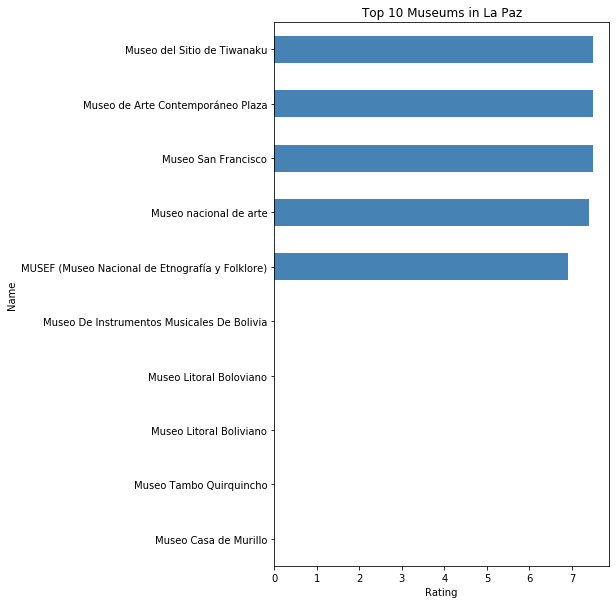

In [71]:
# generate plot
df_top10.plot(kind='barh', figsize=(6, 10), color='steelblue')
plt.xlabel('Rating')
plt.title('Top 10 Museums in La Paz')
#-->
#<!--
plt.show()
#-->

# Let's check how many Museum were returned for each category

In [72]:
df_Paz_Museos_L.groupby('Name').count()

,Latitude,Longitude,Category,id,Rating
Name,,,,,
Casa Museo Solón,1,1,1,1,1
MUSEF (Museo Nacional de Etnografía y Folklore),1,1,1,1,1
Museo Casa de Murillo,1,1,1,1,1
Museo Cerámico,1,1,1,1,1
"Museo Costumbrista ""Juan de Vargas""",1,1,1,1,1
Museo Cuetillero,1,1,1,1,1
"Museo De Atte Contemoraneo ""Plaza""",1,1,1,1,1
Museo De Instrumentos Musicales De Bolivia,1,1,1,1,1
Museo De Metales Preciosos Precolombinos,1,1,1,1,1


In [73]:
# Analyze Each Museum

# one hot encoding
MuseoPaz_onehot = pd.get_dummies(df_Paz_Museos_L[['Category']], prefix="", prefix_sep="")

# move name column to the first column
fixed_columns = [MuseoPaz_onehot.columns[-1]] + list(MuseoPaz_onehot.columns[:-1])
MuseoPaz_onehot = MuseoPaz_onehot[fixed_columns]

MuseoPaz_onehot.head()

,Theme Park Ride / Attraction,Art Gallery,Art Museum,Bar,Cultural Center,History Museum,Museum,Science Museum
Name,,,,,,,,
Museo De Metales Preciosos Precolombinos,0,0,0,0,0,0,1,0
Museo Cerámico,0,0,0,0,0,1,0,0
Museo Del Litoral Boliviano,0,0,0,0,0,1,0,0
Museo Historico del Colegio Militar del Ejercito,0,0,0,0,0,1,0,0
Museo de Arte Antonio Paredes Candia,0,0,1,0,0,0,0,0


In [74]:
# Next, let's group rows by Museums and by taking the mean of the frequency of occurrence of each category
MuseoPaz_grouped = MuseoPaz_onehot.groupby('Name').mean().reset_index()
MuseoPaz_grouped

,Name,Theme Park Ride / Attraction,Art Gallery,Art Museum,Bar,Cultural Center,History Museum,Museum,Science Museum
0,Casa Museo Solón,0,0,1,0,0,0,0,0
1,MUSEF (Museo Nacional de Etnografía y Folklore),0,0,0,0,0,0,1,0
2,Museo Casa de Murillo,0,0,0,0,0,1,0,0
3,Museo Cerámico,0,0,0,0,0,1,0,0
4,"Museo Costumbrista ""Juan de Vargas""",0,0,0,0,0,0,1,0
5,Museo Cuetillero,0,0,0,1,0,0,0,0
6,"Museo De Atte Contemoraneo ""Plaza""",0,0,1,0,0,0,0,0
7,Museo De Instrumentos Musicales De Bolivia,0,0,0,0,0,1,0,0
8,Museo De Metales Preciosos Precolombinos,0,0,0,0,0,0,1,0
9,Museo De Textiles Andinos Bolivianos,0,0,1,0,0,0,0,0


In [75]:
# Let's confirm the new size
MuseoPaz_grouped.shape

Museos_Paz_Top = MuseoPaz_grouped.drop([ ], axis =0)
print("Shape: ", Museos_Paz_Top.shape)
Museos_Paz_Top.head(1)

Shape:  (32, 9)


,Name,Theme Park Ride / Attraction,Art Gallery,Art Museum,Bar,Cultural Center,History Museum,Museum,Science Museum
0,Casa Museo Solón,0,0,1,0,0,0,0,0


In [76]:
# Let's put that into a pandas dataframe
# First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [77]:
# Now let's create the new dataframe and display the top 5 venues for each Museums

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Museum_venues_sorted = pd.DataFrame(columns=columns)
Museum_venues_sorted['Name'] = Museos_Paz_Top['Name']

for ind in np.arange(Museos_Paz_Top.shape[0]):
    Museum_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Museos_Paz_Top.iloc[ind, :], num_top_venues)


Museum_venues_sorted.head()

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Casa Museo Solón,Art Museum,Science Museum,Museum,History Museum,Cultural Center
1,MUSEF (Museo Nacional de Etnografía y Folklore),Museum,Science Museum,History Museum,Cultural Center,Bar
2,Museo Casa de Murillo,History Museum,Science Museum,Museum,Cultural Center,Bar
3,Museo Cerámico,History Museum,Science Museum,Museum,Cultural Center,Bar
4,"Museo Costumbrista ""Juan de Vargas""",Museum,Science Museum,History Museum,Cultural Center,Bar


# Cluster Museums

In [78]:
# Run k-means to cluster the name into 5 clusters.
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

Museum_grouped_clustering = Museos_Paz_Top.drop('Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Museum_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 3, 1, 1, 3, 0, 2, 1, 3, 2], dtype=int32)

In [79]:
# Let's create a new dataframe that includes the cluster as well as the top 5 venues for each Museum.

# add clustering labels
Museum_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Museum_merged = df_Paz_Museos

# merge toronto_grouped with latitude/longitude for each name
Museum_merged = Museum_merged.join(Museum_venues_sorted.set_index('Name'), on='Museo_name_Paz')

#.....
Museum_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
                                

Museum_merged.head() # check the last columns!


,Museo_Id_Paz,Museo_Paz,Museo_Address_Paz,Museo_Paz_Lat,Museo_Paz_Long,Museo_name_Paz,Museo_city_Paz,Museo_Address_Paz,Museo_Latitude_Paz,Museo_Longitude_Paz,Museo_Category_Paz,Museum_Venue_id_Paz,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,4dd86975d22d38ef4301d129,Museo De Metales Preciosos Precolombinos,"[Calle Jaen 777, La Paz, Bolivia]",-16.496983,-68.133939,Museo De Metales Preciosos Precolombinos,La Paz,"[Calle Jaen 777, La Paz, Bolivia]",-16.496983,-68.133939,Museum,4dd86975d22d38ef4301d129,3,Museum,Science Museum,History Museum,Cultural Center,Bar
1,4dd86975d22d38ef4301d129,Museo De Metales Preciosos Precolombinos,"[Ingavi #916 (at Jenaro Sanjinés), La Paz, Bol...",-16.496983,-68.133939,MUSEF (Museo Nacional de Etnografía y Folklore),La Paz,"[Ingavi #916 (at Jenaro Sanjinés), La Paz, Bol...",-16.494466,-68.135045,Museum,4cde7ad89fda8eeca4369f03,3,Museum,Science Museum,History Museum,Cultural Center,Bar
2,4dd86975d22d38ef4301d129,Museo De Metales Preciosos Precolombinos,"[Linares 906 (Sagarnaga), La Paz, Bolivia]",-16.496983,-68.133939,Museo de la Coca,La Paz,"[Linares 906 (Sagarnaga), La Paz, Bolivia]",-16.496417,-68.139337,Museum,51d71728e4b00508e629bdf2,3,Museum,Science Museum,History Museum,Cultural Center,Bar
3,4dd86975d22d38ef4301d129,Museo De Metales Preciosos Precolombinos,"[R Ortiz, La Paz, Bolivia]",-16.496983,-68.133939,"Museo De Atte Contemoraneo ""Plaza""",La Paz,"[R Ortiz, La Paz, Bolivia]",-16.496545,-68.134007,Art Museum,4e06777dd1640223a49708fc,2,Art Museum,Science Museum,Museum,History Museum,Cultural Center
4,4dd86975d22d38ef4301d129,Museo De Metales Preciosos Precolombinos,"[Comercio (at Socabaya), La Paz, Bolivia]",-16.496983,-68.133939,Museo nacional de arte,La Paz,"[Comercio (at Socabaya), La Paz, Bolivia]",-16.495748,-68.134499,Art Museum,4cdeed8498ab6a31603660e1,2,Art Museum,Science Museum,Museum,History Museum,Cultural Center


In [80]:
# Finally, let's visualize the resulting clusters
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Museum_merged['Museo_Latitude_Paz'], Museum_merged['Museo_Longitude_Paz'], Museum_merged['Museo_name_Paz'], Museum_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 

# Rio de Janeiro - Brasil

In [89]:
# So let's start by converting the Rio de Janeiro - Brasil address to its latitude and longitude coordinates.

CLIENT_ID = 'MXVOCRETRHPHVHZI143MG2WC4534NVEZUXJQWNJL5MYSQD0B' # your Foursquare ID
CLIENT_SECRET = 'KIK1KXKYHXJGTPAE0IBO4SOYRHJ3BLEYYQKMB30FW4BLAAMA' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

address = 'Rio de Janeiro, Brasil'


geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

search_query = 'Museo'
radius = 900000
print(search_query + ' .... OK!')

# Search for Museum places category
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

-22.9110137 -43.2093727
Museo .... OK!


'https://api.foursquare.com/v2/venues/search?client_id=MXVOCRETRHPHVHZI143MG2WC4534NVEZUXJQWNJL5MYSQD0B&client_secret=KIK1KXKYHXJGTPAE0IBO4SOYRHJ3BLEYYQKMB30FW4BLAAMA&ll=-22.9110137,-43.2093727&v=20180604&query=Museo&radius=900000&limit=30'

In [90]:
# Send the GET Request and examine the results

results2 = requests.get(url).json()

# Get relevant part of JSON and transform it into a pandas dataframe

# assign relevant part of JSON to venues
venues2 = results2['response']['venues']


# define the dataframe columns
column_names = ['Id','Museo', 'Address', 'Latitude', 'Longitude'] 

# instantiate the dataframe
Museos_Rio = pd.DataFrame(columns=column_names)

#museum data with address, latitude and longitude
for data in venues2:
    Ids_Rio = data['id'] 
    museo_Rio = data['name'] 
        
    location_lat_Rio = data['location']['lat']
    location_lng_Rio = data['location']['lng']
 
    location_Add_Rio = data['location']['formattedAddress']    
    location_address_Rio = location_Add [0]
    #neighborhood_city = neighborhood_latlon[1]
    
    Museos_Rio = Museos_Rio.append({'Museo':museo_Rio,
                            'Id':Ids_Rio,
                            'Address': location_address_Rio,
                            'Latitude': location_lat_Rio,
                            'Longitude': location_lng_Rio}, ignore_index=True)

print("Shape: ", Museos_Rio.shape)

Shape:  (11, 5)


In [91]:
# import library to handle requests
import requests

# create a pandas dataframe 
df_Rio_Museos = pd.DataFrame(columns = ['Museo_Id_Rio', 'Museo_Rio', 'Museo_Address_Rio', 'Museo_Rio_Lat', 'Museo_Rio_Long','Museo_name_Rio', 
                                        'Museo_city_Rio', 'Museo_Address_Rio', 'Museo_Latitude_Rio', 'Museo_Longitude_Rio', 'Museo_Category_Rio',
                                       'Museum_Venue_id_Rio'])

# URL parameters
RADIUS = 2000
QUERY = 'Museo'
LIMIT = 50
    
    

# Loop through the New York neighborhood data
for index, row in Museos_Rio.iterrows():
    # retrieve name details from the dataframe for current row
    Id = row[0]
    Museo = row[1]
    Museo_Add = row[2]
    LATITUDE = row[3]
    LONGITUDE = row[4]
    
    # fetch the results from the Search API for the name
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                                   CLIENT_SECRET,
                                                                                                                                   LATITUDE,
                                                                                                                                   LONGITUDE,
                                                                                                                                   VERSION,
                                                                                                                                   QUERY,
                                                                                                                                   RADIUS,
                                                                                                                                   LIMIT)
    results2 = requests.get(url).json()
    
   

    # Loop through the List of museum retrieved from Foursquare for the name
    for i in range(0,len(results2['response']['venues'])):
        # retrieve museum details from the result list for current row
        Museum_name_Rio = results2['response']['venues'][i]['name']
        
        try:
            Museum_city_Rio = results2['response']['venues'][i]['location']['city']
        except:
            Museum_city_Rio = ''
            
        Museum_address_Rio = results2['response']['venues'][i]['location']['formattedAddress']
        Museum_latitude_Rio = results2['response']['venues'][i]['location']['lat']
        Museum_longitude_Rio = results2['response']['venues'][i]['location']['lng']
        Museum_Venue_id_Rio = results2['response']['venues'][i]['id']
        
  # Check to see if the museum has any categories
        if (len(results2['response']['venues'][i]['categories']) > 0):
            Museum_category_Rio = results2['response']['venues'][i]['categories'][0]['name']
        else:
            Museum_category_Rio = ''
        
        # Add the data row to the Museum dataframe
        df_Rio_Museos = df_Rio_Museos.append({'Museo_Id_Rio' : Id,
                                              'Museo_Rio' : Museo, 
                                              'Museo_Address_Rio' : Museo_Add, 
                                              'Museo_Rio_Lat' : LATITUDE, 
                                              'Museo_Rio_Long' : LONGITUDE,  
                                              'Museo_name_Rio' : Museum_name_Rio,
                                              'Museo_city_Rio' : Museum_city_Rio, 
                                              'Museo_Address_Rio' : Museum_address_Rio,
                                              'Museo_Latitude_Rio' : Museum_latitude_Rio,
                                              'Museo_Longitude_Rio' : Museum_longitude_Rio, 
                                              'Museo_Category_Rio' : Museum_category_Rio,
                                               'Museum_Venue_id_Rio' : Museum_Venue_id_Rio}, ignore_index=True)

# Print the first row of the museum dataframe
df_Rio_Museos.head(1)

# create a copy of the museumss dataframe for storing the new list without the duplicate museums
df_Rio_Museos_L = df_Rio_Museos.drop_duplicates(subset='Museum_Venue_id_Rio', keep='first', inplace=False)
print (df_Rio_Museos_L.shape)
df_Rio_Museos_L.head(10)       

(11, 12)


,Museo_Id_Rio,Museo_Rio,Museo_Address_Rio,Museo_Rio_Lat,Museo_Rio_Long,Museo_name_Rio,Museo_city_Rio,Museo_Address_Rio,Museo_Latitude_Rio,Museo_Longitude_Rio,Museo_Category_Rio,Museum_Venue_id_Rio
0,4ff3896be4b0734a79205c9b,Museo,[Brasil],-22.970362,-43.185856,Museo,,[Brasil],-22.970362,-43.185856,Housing Development,4ff3896be4b0734a79205c9b
1,4ff3896be4b0734a79205c9b,Museo,[Brasil],-22.970362,-43.185856,Museo Museologia e Museografia,,[Brasil],-22.975374,-43.189755,Office,4d7a3abfceaa224bf8810671
2,4ff3896be4b0734a79205c9b,Museo,"[Rua Alice 209, Rio de Janeiro, RJ, Brasil]",-22.970362,-43.185856,Museo Produtora,Rio de Janeiro,"[Rua Alice 209, Rio de Janeiro, RJ, Brasil]",-22.984724,-43.193185,Coworking Space,51d5f9c6498ec155371737d9
9,4b058724f964a520f08122e3,Museu Histórico Nacional,"[Pç. Mal. Âncora, s/n, Rio de Janeiro, RJ, 200...",-22.905739,-43.169167,Museu Histórico Nacional,Rio de Janeiro,"[Pç. Mal. Âncora, s/n, Rio de Janeiro, RJ, 200...",-22.905739,-43.169167,History Museum,4b058724f964a520f08122e3
10,4b058724f964a520f08122e3,Museu Histórico Nacional,"[Pç. Mauá, 1, Rio de Janeiro, RJ, 20081-240, B...",-22.905739,-43.169167,Museu do Amanhã,Rio de Janeiro,"[Pç. Mauá, 1, Rio de Janeiro, RJ, 20081-240, B...",-22.895122,-43.179855,Science Museum,56741ea6498e999035b89e4c
13,50fd380ce4b052c5a6d59894,Escola de Museologia da UNIRIO,"[Av. Pasteur, 458 - Urca, Brasil]",-22.928341,-43.176573,Escola de Museologia da UNIRIO,,"[Av. Pasteur, 458 - Urca, Brasil]",-22.928341,-43.176573,College Academic Building,50fd380ce4b052c5a6d59894
14,50fd380ce4b052c5a6d59894,Escola de Museologia da UNIRIO,"[Rua Álvaro Alvim, 48 - Salas 403 e 404, Centr...",-22.928341,-43.176573,Conselho Regional de Museologia,Rio de Janeiro,"[Rua Álvaro Alvim, 48 - Salas 403 e 404, Centr...",-22.945263,-43.188093,Office,543d2a3f498e48b8d46dcc23
17,543d2a3f498e48b8d46dcc23,Conselho Regional de Museologia,"[Av. Pasteur, 458 - Urca, Brasil]",-22.945263,-43.188093,Escola de Museologia da UNIRIO,,"[Av. Pasteur, 458 - Urca, Brasil]",-22.955028,-43.169363,College Academic Building,50fd3933e4b04cfffe5df954
20,5c9e04abf1936e002c9758cf,Biblioteca do Museu Imperial,"[Museu Imperial, Petrópolis, RJ, 25610-320, Br...",-22.507681,-43.174805,Biblioteca do Museu Imperial,Petrópolis,"[Museu Imperial, Petrópolis, RJ, 25610-320, Br...",-22.507681,-43.174805,Library,5c9e04abf1936e002c9758cf
21,5c9e04abf1936e002c9758cf,Biblioteca do Museu Imperial,"[R. da Imperatriz, 220 (R. Nilo Peçanha), Petr...",-22.507681,-43.174805,Museu Imperial,Petrópolis,"[R. da Imperatriz, 220 (R. Nilo Peçanha), Petr...",-22.507829,-43.175868,History Museum,4b9bf41ef964a520013a36e3


# Museum Ratings from Foursquare

In [92]:
# Loop through the List of Museums to find the ratings for each
for index, row in df_Rio_Museos_L.iterrows():
    VENUE_ID = row[11] # this is the Foursquare Venue Id
    
    # Use the Foursquare Venue details API to fetch the venue details
    details_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(VENUE_ID,
                                                                                                  CLIENT_ID,
                                                                                                  CLIENT_SECRET,
                                                                                                  VERSION)
    venue_details = requests.get(details_url).json()
    
    # Read the rating for the venue from the API result
    try:
        rating = venue_details['response']['venue']['rating']
    except:
        rating = 0

    # populate the rating onto the museums dataframe
    df_Rio_Museos_L.loc[index, 'Rating'] = rating

df_Rio_Museos_L.head(2)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Museo_Id_Rio,Museo_Rio,Museo_Address_Rio,Museo_Rio_Lat,Museo_Rio_Long,Museo_name_Rio,Museo_city_Rio,Museo_Address_Rio,Museo_Latitude_Rio,Museo_Longitude_Rio,Museo_Category_Rio,Museum_Venue_id_Rio,Rating
0,4ff3896be4b0734a79205c9b,Museo,[Brasil],-22.970362,-43.185856,Museo,,[Brasil],-22.970362,-43.185856,Housing Development,4ff3896be4b0734a79205c9b,0.0
1,4ff3896be4b0734a79205c9b,Museo,[Brasil],-22.970362,-43.185856,Museo Museologia e Museografia,,[Brasil],-22.975374,-43.189755,Office,4d7a3abfceaa224bf8810671,0.0


# Barh Clasification

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


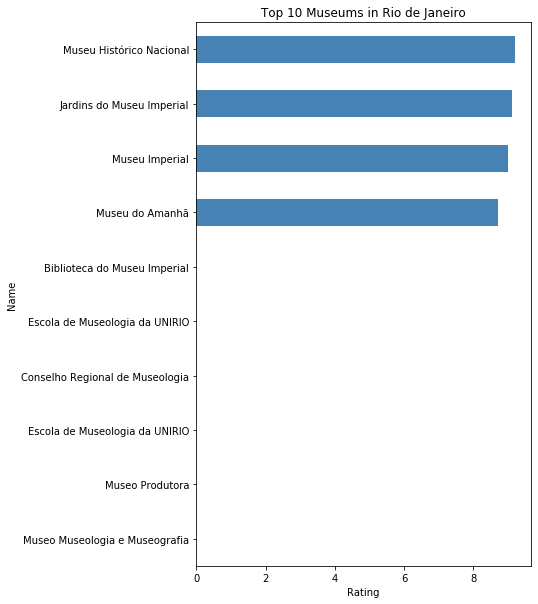

In [93]:
# Clean up the dataset to remove columns that are not informative to us for visualization 

df_Rio_Museos_L.drop(['Museo_Id_Rio', 'Museo_Rio', 'Museo_Address_Rio', 'Museo_Rio_Lat', 'Museo_Rio_Long','Museo_city_Rio'], axis=1, inplace=True)

# let's view the firs element and see how the dataframe was changed
df_Rio_Museos_L.head()
# Rename some of the columns so that they make sense.

df_Rio_Museos_L.rename(columns={'Museo_name_Rio':'Name', 'Museo_Latitude_Rio':'Latitude','Museo_Longitude_Rio':'Longitude','Museo_Category_Rio':'Category',
                       'Museum_Venue_id_Rio':'id','Rating':'Rating'}, inplace=True)

# let's view the firs element and see how the dataframe was changed
df_Rio_Museos_L.head()
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_Rio_Museos_L.columns)

# Set the Museum name as index - useful for quickly looking up Museum using .loc method.

df_Rio_Museos_L.set_index('Name', inplace=True)

# let's view the firs element and see how the dataframe was changed
df_Rio_Museos_L.head()


#\\ # sort dataframe on 'Rating' column (descending)
df_Rio_Museos_L.sort_values(by='Rating', ascending=True, inplace=True)
#-->

#<!--
#\\ # get top 10 museums
df_top10 = df_Rio_Museos_L['Rating'].tail(10)
df_top10
# generate plot
df_top10.plot(kind='barh', figsize=(6, 10), color='steelblue')
plt.xlabel('Rating')
plt.title('Top 10 Museums in Rio de Janeiro')
#-->

plt.show()

# Let's check how many Museum were returned for each category


In [94]:
df_Rio_Museos_L.groupby('Name').count()
# Analyze Each Museum

# one hot encoding
MuseoRio_onehot = pd.get_dummies(df_Rio_Museos_L[['Category']], prefix="", prefix_sep="")


# move name column to the first column
fixed_columns = [MuseoRio_onehot.columns[-1]] + list(MuseoRio_onehot.columns[:-1])
MuseoRio_onehot = MuseoRio_onehot[fixed_columns]

MuseoRio_onehot.head()
# Next, let's group rows by Museums and by taking the mean of the frequency of occurrence of each category
MuseoRio_grouped = MuseoRio_onehot.groupby('Name').mean().reset_index()
MuseoRio_grouped
# Let's confirm the new size
MuseoRio_grouped.shape

Museos_Rio_Top = MuseoRio_grouped.drop([ ], axis =0)
print("Shape: ", Museos_Rio_Top.shape)
Museos_Rio_Top.head(1)
# Let's put that into a pandas dataframe
# First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


# Now let's create the new dataframe and display the top 10 venues for each Museums

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Museum_venues_sorted = pd.DataFrame(columns=columns)
Museum_venues_sorted['Name'] = Museos_Rio_Top['Name']

for ind in np.arange(Museos_Rio_Top.shape[0]):
    Museum_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Museos_Rio_Top.iloc[ind, :], num_top_venues)


Museum_venues_sorted.head()

Shape:  (10, 9)


,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Biblioteca do Museu Imperial,Library,Office,Housing Development,History Museum,Garden
1,Conselho Regional de Museologia,Office,Library,Housing Development,History Museum,Garden
2,Escola de Museologia da UNIRIO,College Academic Building,Office,Library,Housing Development,History Museum
3,Jardins do Museu Imperial,Garden,Office,Library,Housing Development,History Museum
4,Museo,Housing Development,Office,Library,History Museum,Garden


# Cluster Museums

In [88]:


#-->



# Run k-means to cluster the museum into 5 clusters.
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

Museum_grouped_clustering = Museos_Rio_Top.drop('Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Museum_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
# Let's create a new dataframe that includes the cluster as well as the top 5 venues for each Museum.

# add clustering labels
Museum_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Museum_merged = df_Rio_Museos

# merge Museum_grouped with latitude/longitude for each name
Museum_merged = Museum_merged.join(Museum_venues_sorted.set_index('Name'), on='Museo_name_Rio')

#.....
Museum_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
                                

Museum_merged.head() # check the last columns!

# Finally, let's visualize the resulting clusters
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Museum_merged['Museo_Latitude_Rio'], Museum_merged['Museo_Longitude_Rio'], Museum_merged['Museo_name_Rio'], Museum_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 

# Buenos Aires - Argentina

In [95]:
# So let's start by converting the Rio de Janeiro - Brasil address to its latitude and longitude coordinates.
CLIENT_ID = 'Y5QSJAMHKFFENZTG1UD5RFQ5T5Q12DMML1VFMO1J4JKIQJSM' # your Foursquare ID
CLIENT_SECRET = 'UKAKLV4RIELRBUHWYDKRYTQH5VO2LIO3YS2TNTK124HDNMED' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

address = 'Buenos Aires, Argentina'


geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

search_query = 'Museo'
radius = 900000
print(search_query + ' .... OK!')

# Search for Museum places category
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

-34.6075682 -58.4370894
Museo .... OK!


'https://api.foursquare.com/v2/venues/search?client_id=Y5QSJAMHKFFENZTG1UD5RFQ5T5Q12DMML1VFMO1J4JKIQJSM&client_secret=UKAKLV4RIELRBUHWYDKRYTQH5VO2LIO3YS2TNTK124HDNMED&ll=-34.6075682,-58.4370894&v=20180604&query=Museo&radius=900000&limit=30'

In [96]:
# Send the GET Request and examine the results

results3 = requests.get(url).json()

# Get relevant part of JSON and transform it into a pandas dataframe

# assign relevant part of JSON to venues
venues3 = results3['response']['venues']


# define the dataframe columns
column_names = ['Id','Museo', 'Address', 'Latitude', 'Longitude'] 

# instantiate the dataframe
Museos_Air = pd.DataFrame(columns=column_names)

#museum data with address, latitude and longitude
for data in venues3:
    Ids_Air = data['id'] 
    museo_Air = data['name'] 
        
    location_lat_Air = data['location']['lat']
    location_lng_Air = data['location']['lng']
 
    location_Add_Air = data['location']['formattedAddress']    
    location_address_Air = location_Add [0]
    #neighborhood_city = neighborhood_latlon[1]
    
    Museos_Air = Museos_Air.append({'Museo':museo_Air,
                            'Id':Ids_Air,
                            'Address': location_address_Air,
                            'Latitude': location_lat_Air,
                            'Longitude': location_lng_Air}, ignore_index=True)

print("Shape: ", Museos_Air.shape)

Shape:  (30, 5)


In [97]:
# import library to handle requests
import requests

# create a pandas dataframe 
df_Air_Museos = pd.DataFrame(columns = ['Museo_Id_Air', 'Museo_Air', 'Museo_Address_Air', 'Museo_Air_Lat', 'Museo_Air_Long','Museo_name_Air', 
                                        'Museo_city_Air', 'Museo_Address_Air', 'Museo_Latitude_Air', 'Museo_Longitude_Air', 'Museo_Category_Air',
                                       'Museum_Venue_id_Air'])

# URL parameters
RADIUS = 2000
QUERY = 'Museo'
LIMIT = 50
    
    

# Loop through the Museum in BUenos Aires
for index, row in Museos_Air.iterrows():
    # retrieve name details from the dataframe for current row
    Id = row[0]
    Museo = row[1]
    Museo_Add = row[2]
    LATITUDE = row[3]
    LONGITUDE = row[4]
    
    # fetch the results from the Search API for the name 
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID,
                                                                                                                                   CLIENT_SECRET,
                                                                                                                                   LATITUDE,
                                                                                                                                   LONGITUDE,
                                                                                                                                   VERSION,
                                                                                                                                   QUERY,
                                                                                                                                   RADIUS,
                                                                                                                                   LIMIT)
    results3 = requests.get(url).json()
    
   

    # Loop through the List of museum retrieved from Foursquare for the name
    for i in range(0,len(results3['response']['venues'])):
        # retrieve restaurant details from the result list for current row
        Museum_name_Air = results3['response']['venues'][i]['name']
        
        try:
            Museum_city_Air = results3['response']['venues'][i]['location']['city']
        except:
            Museum_city_Air = ''
            
        Museum_address_Air = results3['response']['venues'][i]['location']['formattedAddress']
        Museum_latitude_Air = results3['response']['venues'][i]['location']['lat']
        Museum_longitude_Air = results3['response']['venues'][i]['location']['lng']
        Museum_Venue_id_Air = results3['response']['venues'][i]['id']
        
  # Check to see if the museum has any categories
        if (len(results3['response']['venues'][i]['categories']) > 0):
            Museum_category_Air = results3['response']['venues'][i]['categories'][0]['name']
        else:
            Museum_category_Air = ''
        
        # Add the data row to the Museum dataframe
        df_Air_Museos = df_Air_Museos.append({'Museo_Id_Air' : Id,
                                              'Museo_Air' : Museo, 
                                              'Museo_Address_Air' : Museo_Add, 
                                              'Museo_Air_Lat' : LATITUDE, 
                                              'Museo_Air_Long' : LONGITUDE,  
                                              'Museo_name_Air' : Museum_name_Air,
                                              'Museo_city_Air' : Museum_city_Air, 
                                              'Museo_Address_Air' : Museum_address_Air,
                                              'Museo_Latitude_Air' : Museum_latitude_Air,
                                              'Museo_Longitude_Air' : Museum_longitude_Air, 
                                              'Museo_Category_Air' : Museum_category_Air,
                                               'Museum_Venue_id_Air' : Museum_Venue_id_Air}, ignore_index=True)

# Print the first  rows of the Museum dataframe
df_Air_Museos.head(1)

# create a copy of the restaurants dataframe for storing the new list without the duplicate museums
df_Air_Museos_L = df_Air_Museos.drop_duplicates(subset='Museum_Venue_id_Air', keep='first', inplace=False)
print (df_Air_Museos_L.shape)
df_Air_Museos_L.head(10)

(108, 12)


,Museo_Id_Air,Museo_Air,Museo_Address_Air,Museo_Air_Lat,Museo_Air_Long,Museo_name_Air,Museo_city_Air,Museo_Address_Air,Museo_Latitude_Air,Museo_Longitude_Air,Museo_Category_Air,Museum_Venue_id_Air
0,4b05871af964a520de7f22e3,"Museo Argentino de Ciencias Naturales ""Bernard...","[Parque Centenario, C1405DJR Buenos Aires, Bue...",-34.605458,-58.438039,"Museo Argentino de Ciencias Naturales ""Bernard...",Buenos Aires,"[Parque Centenario, C1405DJR Buenos Aires, Bue...",-34.605458,-58.438039,Science Museum,4b05871af964a520de7f22e3
1,4b05871af964a520de7f22e3,"Museo Argentino de Ciencias Naturales ""Bernard...",[Pujol 644 (e/ Méndez de Andes y Felipe Valles...,-34.605458,-58.438039,Museo de Esculturas Luis Perlotti,Buenos Aires,[Pujol 644 (e/ Méndez de Andes y Felipe Valles...,-34.615083,-58.448306,Art Museum,51681520e4b05224c5b8b4e5
2,4b05871af964a520de7f22e3,"Museo Argentino de Ciencias Naturales ""Bernard...",[Humahuaca 4662 (e/ Avenida Estado de Israel y...,-34.605458,-58.438039,Museo Kosice,Buenos Aires,[Humahuaca 4662 (e/ Avenida Estado de Israel y...,-34.601000,-58.430614,Art Museum,59ffecb8f870fd480c06df94
6,51681520e4b05224c5b8b4e5,Museo de Esculturas Luis Perlotti,"[Yerbal 2370, Buenos Aires, Buenos Aires C.F.,...",-34.615083,-58.448306,Esc. Primaria Comun N° 01 Museo de Bellas Arte...,Buenos Aires,"[Yerbal 2370, Buenos Aires, Buenos Aires C.F.,...",-34.627593,-58.462645,School,5286979c11d2f30766edbc48
7,51681520e4b05224c5b8b4e5,Museo de Esculturas Luis Perlotti,"[Buenos Aires, Buenos Aires C.F., Argentina]",-34.615083,-58.448306,Flores,Buenos Aires,"[Buenos Aires, Buenos Aires C.F., Argentina]",-34.628129,-58.462863,Neighborhood,4fdbfc79e4b0f8bdf3b7ab52
8,4b058719f964a520cc7f22e3,Museo Xul Solar,[Laprida 1212 (esq. Gral. Lucio Norberto Mansi...,-34.594703,-58.407793,Museo Xul Solar,Buenos Aires,[Laprida 1212 (esq. Gral. Lucio Norberto Mansi...,-34.594703,-58.407793,Museum,4b058719f964a520cc7f22e3
9,4b058719f964a520cc7f22e3,Museo Xul Solar,[Charcas 2837 (e/ Dr. Tomás Manuel de Anchoren...,-34.594703,-58.407793,Museo Casa de Ricardo Rojas,Buenos Aires,[Charcas 2837 (e/ Dr. Tomás Manuel de Anchoren...,-34.593529,-58.407265,History Museum,5359688f498e19044f52d1b9
10,4b058719f964a520cc7f22e3,Museo Xul Solar,"[Facultad de Medicina (UBA) (4° Piso), Buenos ...",-34.594703,-58.407793,Museo de Patología,Buenos Aires,"[Facultad de Medicina (UBA) (4° Piso), Buenos ...",-34.598783,-58.400013,Science Museum,521bdf5011d2690f53e1feaa
11,4b058719f964a520cc7f22e3,Museo Xul Solar,[Vicente López 2220 (entre Azcuénaga y Av. Pue...,-34.594703,-58.407793,Museo Roca,Buenos Aires,[Vicente López 2220 (entre Azcuénaga y Av. Pue...,-34.587858,-58.395684,History Museum,518d3b48498ea74f863727a6
12,4b058719f964a520cc7f22e3,Museo Xul Solar,[Av. del Libertador 1902 (esq. Pereyra Lucena)...,-34.594703,-58.407793,Museo Nacional de Arte Decorativo (MNAD),Buenos Aires,[Av. del Libertador 1902 (esq. Pereyra Lucena)...,-34.582668,-58.400644,Art Museum,4b1aaf7cf964a5205eef23e3


# Museum Ratings from Foursquare

In [98]:
# Loop through the List of Museums to find the ratings for each
for index, row in df_Air_Museos_L.iterrows():
    VENUE_ID = row[11] # this is the Foursquare Venue Id
    
    # Use the Foursquare Venue details API to fetch the venue details
    details_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(VENUE_ID,
                                                                                                  CLIENT_ID,
                                                                                                  CLIENT_SECRET,
                                                                                                  VERSION)
    venue_details = requests.get(details_url).json()
    
    # Read the rating for the venue from the API result
    try:
        rating = venue_details['response']['venue']['rating']
    except:
        rating = 0

    # populate the rating onto the restaurants dataframe
    df_Air_Museos_L.loc[index, 'Rating'] = rating

df_Air_Museos_L.head(2)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Museo_Id_Air,Museo_Air,Museo_Address_Air,Museo_Air_Lat,Museo_Air_Long,Museo_name_Air,Museo_city_Air,Museo_Address_Air,Museo_Latitude_Air,Museo_Longitude_Air,Museo_Category_Air,Museum_Venue_id_Air,Rating
0,4b05871af964a520de7f22e3,"Museo Argentino de Ciencias Naturales ""Bernard...","[Parque Centenario, C1405DJR Buenos Aires, Bue...",-34.605458,-58.438039,"Museo Argentino de Ciencias Naturales ""Bernard...",Buenos Aires,"[Parque Centenario, C1405DJR Buenos Aires, Bue...",-34.605458,-58.438039,Science Museum,4b05871af964a520de7f22e3,8.1
1,4b05871af964a520de7f22e3,"Museo Argentino de Ciencias Naturales ""Bernard...",[Pujol 644 (e/ Méndez de Andes y Felipe Valles...,-34.605458,-58.438039,Museo de Esculturas Luis Perlotti,Buenos Aires,[Pujol 644 (e/ Méndez de Andes y Felipe Valles...,-34.615083,-58.448306,Art Museum,51681520e4b05224c5b8b4e5,0.0


# Barh Clasification

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


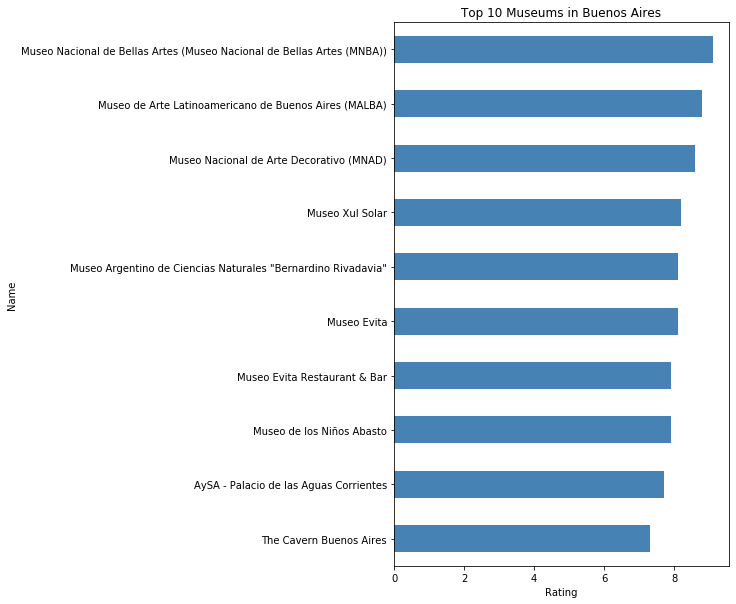

In [99]:

# Clean up the dataset to remove columns that are not informative to us for visualization 

df_Air_Museos_L.drop(['Museo_Id_Air', 'Museo_Air', 'Museo_Address_Air', 'Museo_Air_Lat', 'Museo_Air_Long','Museo_city_Air'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_Air_Museos_L.head()

# Rename some of the columns so that they make sense.

df_Air_Museos_L.rename(columns={'Museo_name_Air':'Name', 'Museo_Latitude_Air':'Latitude','Museo_Longitude_Air':'Longitude','Museo_Category_Air':'Category',
                       'Museum_Venue_id_Air':'id','Rating':'Rating'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_Air_Museos_L.head()
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_Air_Museos_L.columns)

# Set the Museum name as index - useful for quickly looking up Museum using .loc method.

df_Air_Museos_L.set_index('Name', inplace=True)

# let's view the first element and see how the dataframe was changed
df_Air_Museos_L.head()


#\\ # sort dataframe on 'Rating' column (descending)
df_Air_Museos_L.sort_values(by='Rating', ascending=True, inplace=True)
#-->

#<!--
#\\ # get top 10 museums
df_top10 = df_Air_Museos_L['Rating'].tail(10)
df_top10
# generate plot
df_top10.plot(kind='barh', figsize=(6, 10), color='steelblue')
plt.xlabel('Rating')
plt.title('Top 10 Museums in Buenos Aires')
#-->

plt.show()

# Let's check how many Museum were returned for each category

In [101]:

df_Air_Museos_L.groupby('Name').count()
# Analyze Each Museum

# one hot encoding
MuseoAir_onehot = pd.get_dummies(df_Air_Museos_L[['Category']], prefix="", prefix_sep="")


# move neighborhood column to the first column
fixed_columns = [MuseoAir_onehot.columns[-1]] + list(MuseoAir_onehot.columns[:-1])
MuseoAir_onehot = MuseoAir_onehot[fixed_columns]

MuseoAir_onehot.head()
# Next, let's group rows by Museums and by taking the mean of the frequency of occurrence of each category
MuseoAir_grouped = MuseoAir_onehot.groupby('Name').mean().reset_index()
MuseoAir_grouped
# Let's confirm the new size
MuseoAir_grouped.shape

Museos_Air_Top = MuseoAir_grouped.drop([ ], axis =0)
print("Shape: ", Museos_Air_Top.shape)
Museos_Air_Top.head(1)
# Let's put that into a pandas dataframe
# First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


# Now let's create the new dataframe and display the top 10 venues for each Museums

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Museum_venues_sorted = pd.DataFrame(columns=columns)
Museum_venues_sorted['Name'] = Museos_Air_Top['Name']

for ind in np.arange(Museos_Air_Top.shape[0]):
    Museum_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Museos_Air_Top.iloc[ind, :], num_top_venues)


Museum_venues_sorted.head()


Shape:  (107, 32)


,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Archivo y Museo Históricos del Banco de la Pro...,History Museum,Spanish Restaurant,Argentinian Restaurant,Art Gallery,Art Museum
1,Asociación Amigos del Museo Nacional de Bellas...,Non-Profit,Spanish Restaurant,History Museum,Argentinian Restaurant,Art Gallery
2,Av. Cabildo y Juramento,Intersection,Spanish Restaurant,History Museum,Argentinian Restaurant,Art Gallery
3,AySA - Palacio de las Aguas Corrientes,Monument / Landmark,Spanish Restaurant,History Museum,Argentinian Restaurant,Art Gallery
4,"Bar Del Filete, Museo De La Ciudad de Buenos A...",History Museum,Spanish Restaurant,Argentinian Restaurant,Art Gallery,Art Museum


# Cluster Museums

In [102]:

#-->



# Run k-means to cluster the museums into 5 clusters.
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

Museum_grouped_clustering = Museos_Air_Top.drop('Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Museum_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 


# add clustering labels
Museum_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Museum_merged = df_Air_Museos

# merge museums_grouped with  latitude/longitude for each museum
Museum_merged = Museum_merged.join(Museum_venues_sorted.set_index('Name'), on='Museo_name_Air')

#.....
Museum_merged.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
                                

Museum_merged.head() # check the last columns!

# Finally, let's visualize the resulting clusters
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Museum_merged['Museo_Latitude_Air'], Museum_merged['Museo_Longitude_Air'], Museum_merged['Museo_name_Air'], Museum_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters